In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Loading excel dataset into notebook

In [3]:
data = pd.read_excel("Credit Card Customer Data.xlsx")

In [4]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
data.shape

(660, 7)

In [6]:
data['Avg_Credit_Limit'].value_counts()

Avg_Credit_Limit
8000      35
6000      31
9000      28
13000     28
19000     26
          ..
43000      1
146000     1
155000     1
200000     1
167000     1
Name: count, Length: 110, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Countplot to show how many customers using how many numbers of cards

<Axes: xlabel='Total_Credit_Cards', ylabel='count'>

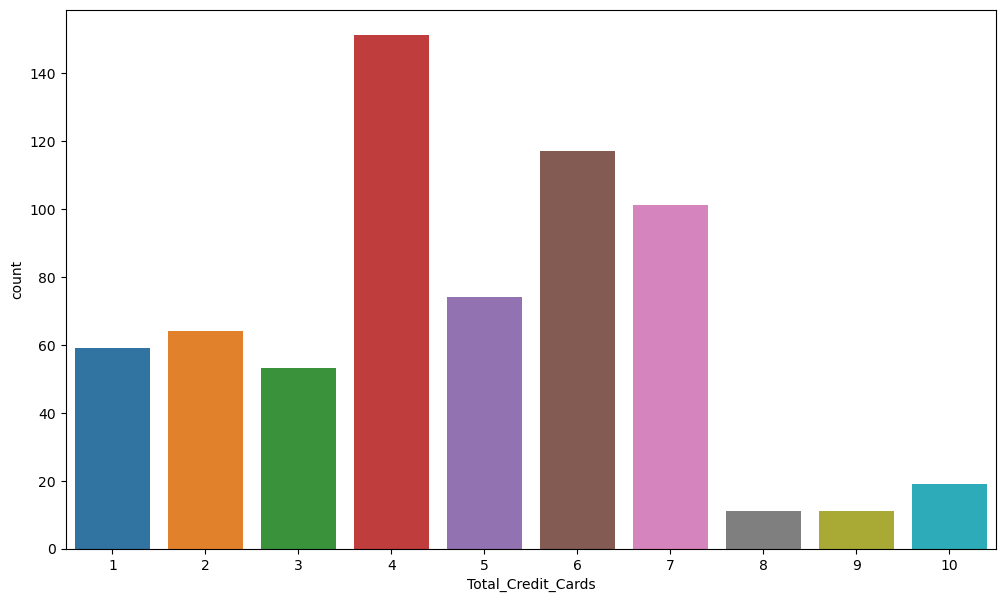

In [8]:
plt.figure(figsize = (12,7))
sns.countplot(x= 'Total_Credit_Cards', data = data)

#### Distribution plot to show average credit card limit of customers

<Axes: xlabel='Avg_Credit_Limit', ylabel='Density'>

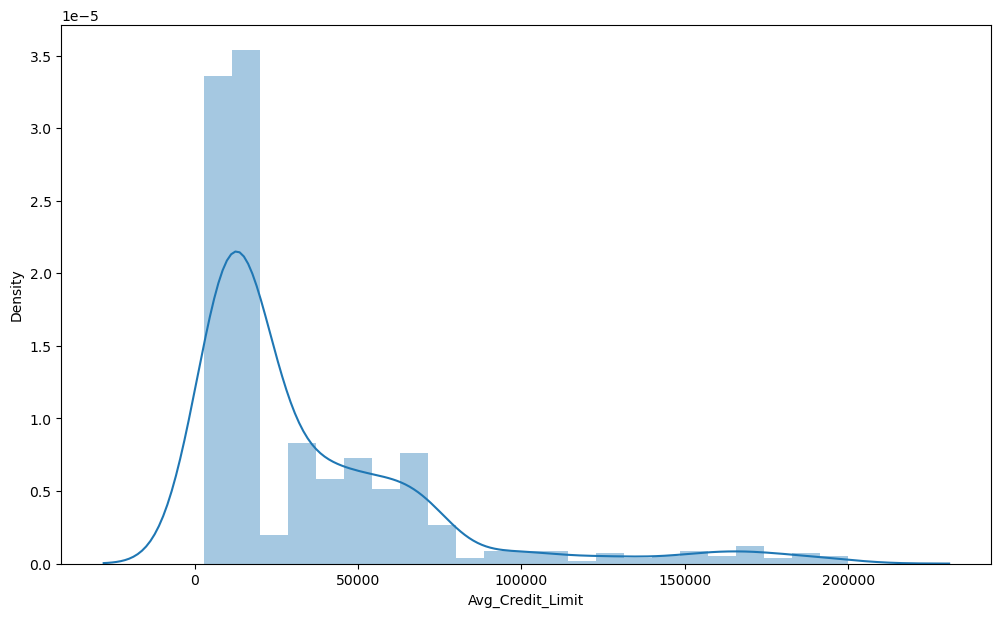

In [9]:
plt.figure(figsize = (12,7))
sns.distplot(data['Avg_Credit_Limit'])

In [10]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

#### Heatmap to show relationship between differents features of credict card consumer dataset

<Axes: >

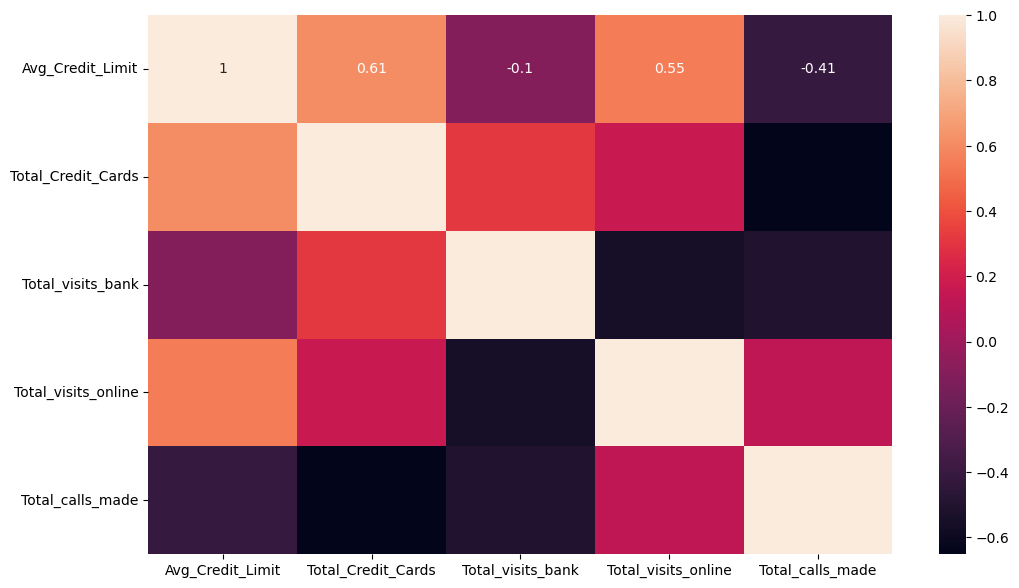

In [11]:
plt.figure(figsize = (12,7))

sns.heatmap(data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].corr(), annot=True)

### 1>" Average credit card limit", "Total credit card" and "Total visit online" is highly correlated as we can see they have correlation score 0.61, so as "Avg. credit limit" is high for those having more number of credit cards and who use online source for transfers.

### 2> "Total Calls made" having a negative impact on users, as we can see "Total calls made" is negatively correlated with "Avg. Credit limit", "Total Credit Cards", "Total visit bank" as total number of call increases from bank the coustomer using credict card and visiting bank is droping.

In [12]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [13]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


### There 2 columns consist of outliar one is "Avg_Credit_Limit" and another is "Total_visit_online".

<Axes: xlabel='Avg_Credit_Limit'>

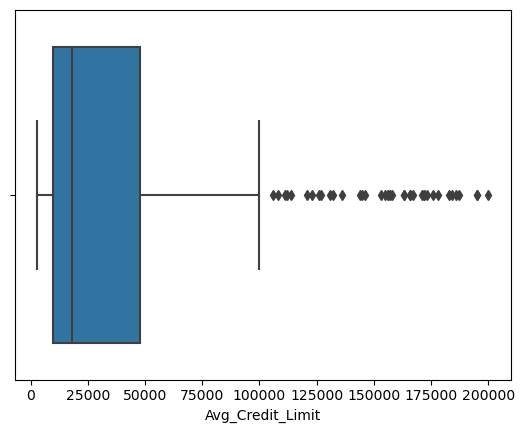

In [14]:
sns.boxplot(x= 'Avg_Credit_Limit', data = data, orient = 'v')

<Axes: xlabel='Total_visits_online'>

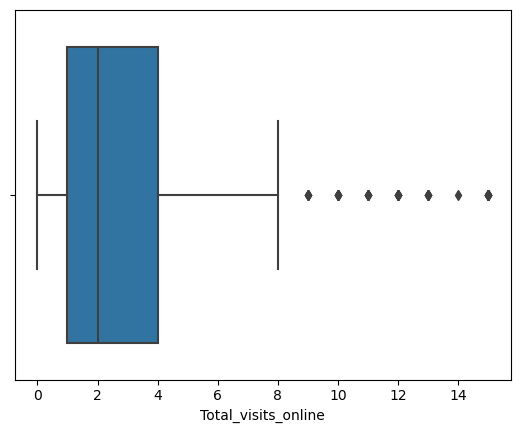

In [15]:
sns.boxplot(x = 'Total_visits_online', data = data, orient = 'v')

In [16]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [17]:
duplicates = data[data.duplicated(subset = ['Customer Key'])]

In [18]:
duplicates

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


### There are 5 duplicate "Customer Key" in this data which is causing redudancy in data which we have to remove to find the correct analysis.

In [19]:
data.drop_duplicates(subset = ['Customer Key'], inplace = True)

In [20]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [21]:
data.shape

(655, 7)

#### Transformation of dataset using standard scaler

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

std_data = scaler.fit_transform(data)

In [23]:
std_data

array([[-1.72285692,  1.25119503,  1.76707628, ..., -0.85856807,
        -0.54664171, -1.25700595],
       [-1.71761151, -0.65048234,  0.42344023, ..., -1.47116294,
         2.51652641,  1.88417679],
       [-1.7123661 , -1.47405141,  0.42344023, ..., -0.85856807,
         0.13406232,  0.13907527],
       ...,
       [ 1.72337746, -0.04784223,  2.97634873, ..., -0.85856807,
         2.1761744 , -0.90798565],
       [ 1.72862287,  1.00036856,  3.70191219, ..., -0.85856807,
         4.21828648, -1.25700595],
       [ 1.73386828,  0.98063229,  3.56754859, ..., -1.47116294,
         3.19723044, -0.55896534]])

#### Now we will train model using KMeans clustering

In [24]:
from sklearn.cluster import KMeans

##### finding the best number of clusters suitable for dataset

In [25]:
wcss = []
cluster_list = range(1,11)
for i in cluster_list:
    kmeans = KMeans(n_clusters = i, random_state=40)
    kmeans.fit(std_data)
    wcss.append(kmeans.inertia_)

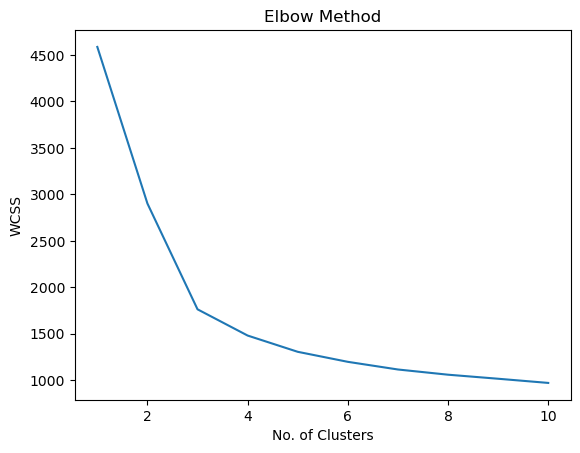

In [26]:
plt.plot(cluster_list, wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [27]:
from sklearn import metrics

In [28]:
from sklearn import cluster

##### finding the best n-cluster by predicting silhouette scores for each n clusters

In [29]:
from sklearn.metrics import silhouette_score 

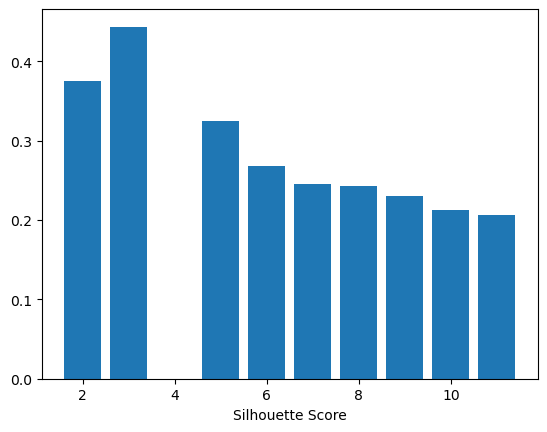

In [30]:
silhouette_scores = []

for n_cluster in range(2, 11):
    silhouette_scores.append(silhouette_score(std_data, KMeans(n_clusters = n_cluster).fit_predict(std_data)))
    

k = [2, 3, 5, 6, 7, 8, 9, 10, 11]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of cluster', fontsize = 10)
plt.xlabel('Silhouette Score', fontsize = 10)
plt.show()

In [31]:
kmeans_values = []

for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, random_state=40).fit_predict(std_data)
    
    sil_score = silhouette_score(std_data, kmeans, metric='euclidean')
    
    print("silhouette score for {} cluster: {}".format(cluster, sil_score))
    kmeans_values.append((cluster, sil_score))

silhouette score for 2 cluster: 0.3750050630746543
silhouette score for 3 cluster: 0.44355673525477457
silhouette score for 4 cluster: 0.3250898365918125
silhouette score for 5 cluster: 0.2675322974552251
silhouette score for 6 cluster: 0.24584499239326787
silhouette score for 7 cluster: 0.24265071282507997
silhouette score for 8 cluster: 0.23063661186646786
silhouette score for 9 cluster: 0.2112569240197942
silhouette score for 10 cluster: 0.20372897453163463


In [32]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

#### Training model on normal dataset without transformation

In [33]:
X = data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]

In [34]:
X.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [35]:
model = KMeans(n_clusters=3)

In [36]:
model.fit(X)

KMeans(n_clusters=3)

In [37]:
y_kmean = model.fit_predict(X)

In [38]:
y_kmean

array([1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [39]:
X = np.array(X)

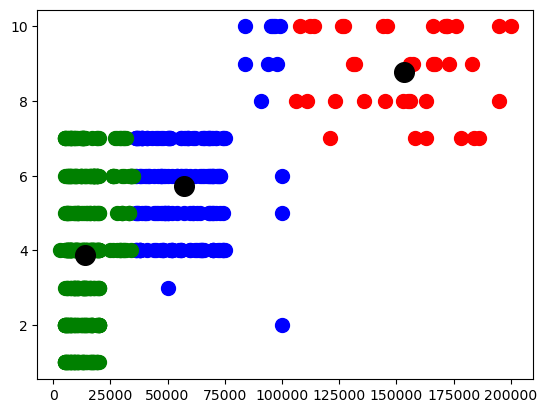

In [40]:
plt.scatter(X[y_kmean==0, 0], X[y_kmean==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmean==1, 0], X[y_kmean==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmean==2, 0], X[y_kmean==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=200, c='black', label = 'Centroids', marker = 'o')

In [41]:
X

array([[100000,      2,      1,      1,      0],
       [ 50000,      3,      0,     10,      9],
       [ 50000,      7,      1,      3,      4],
       ...,
       [145000,      8,      1,      9,      1],
       [172000,     10,      1,     15,      0],
       [167000,      9,      0,     12,      2]], dtype=int64)

#### Training model using tranformed dataset

In [42]:
df1 = pd.DataFrame(std_data, columns = ['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'])

In [43]:
df1.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.722857,1.251195,1.767076,-1.241704,-0.858568,-0.546642,-1.257006
1,-1.717612,-0.650482,0.423440,-0.780379,-1.471163,2.516526,1.884177
2,-1.712366,-1.474051,0.423440,1.064922,-0.858568,0.134062,0.139075
3,-1.707121,-0.569114,-0.114014,0.142271,-0.858568,-0.546642,0.139075
4,-1.701875,-0.297848,1.767076,0.603597,-1.471163,3.197230,-0.209945


In [44]:
Y = df1[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]

In [45]:
Y = np.array(Y)

In [46]:
Y_mod = KMeans(n_clusters = 3)

In [47]:
Y_mod.fit(Y)

KMeans(n_clusters=3)

In [48]:
kmean1 = Y_mod.fit_predict(Y)

In [49]:
kmean1

array([2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

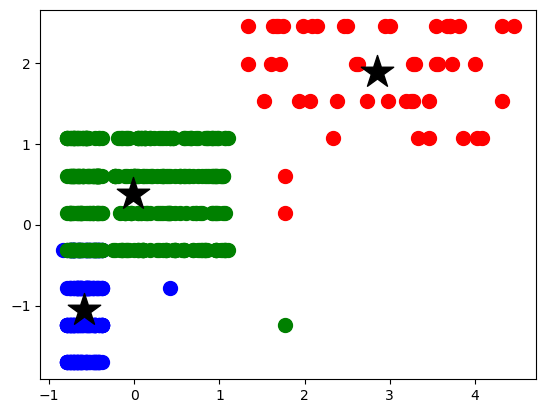

In [50]:
plt.scatter(Y[kmean1==0, 0], Y[kmean1==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(Y[kmean1==1, 0], Y[kmean1==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(Y[kmean1==2, 0], Y[kmean1==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(Y_mod.cluster_centers_[:, 0], Y_mod.cluster_centers_[:, 1], s=600, c='black', label = 'Centroids', marker = '*')

In [51]:
data["Avg_Credit_Limit"].value_counts()

Avg_Credit_Limit
8000      35
6000      31
13000     28
9000      28
19000     26
          ..
91000      1
146000     1
155000     1
200000     1
167000     1
Name: count, Length: 109, dtype: int64

#### 3D plot between Total bank visits, Total bank visits online, Total calls made

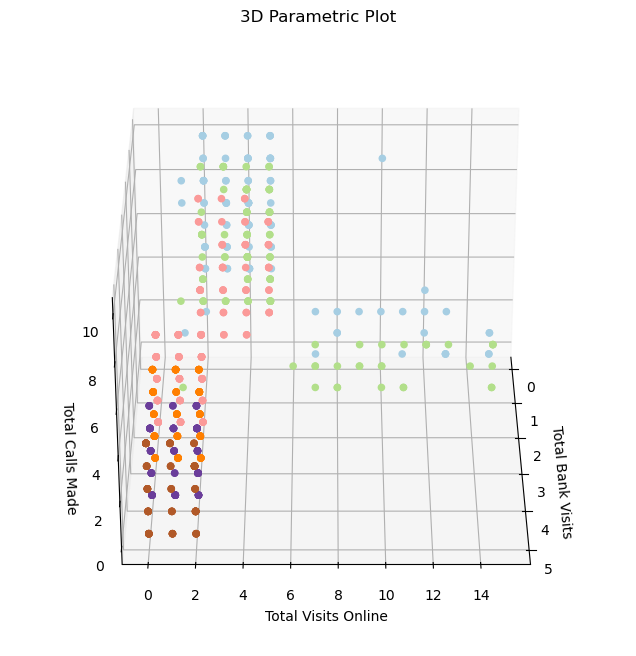

In [52]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure(figsize=(8,8))

ax = plt.axes(projection = '3d')



x = data.Total_visits_bank
y = data.Total_visits_online
z = data.Total_calls_made


g = ax.scatter(x, y, z, c=x, marker='o', depthshade=False, cmap='Paired')
ax.set_title('3D Parametric Plot')

ax.set_xlabel('Total Bank Visits')
ax.set_ylabel('Total Visits Online')
ax.set_zlabel('Total Calls Made')

legend = ax.legend(*g.legend_elements(), loc="lower center", title="Total bank visits", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

from matplotlib import animation

def rotate(angle):
     ax.view_init(azim=angle)

angle = 30
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=1)